In [2]:
import os
import numpy as np
import pandas as pd

In [ ]:
dataset=pd.read_csv('/content/prom_X_20200708-111903.csv')
dataset.head()

In [ ]:
dataset2=pd.read_csv('/content/prom_X_20200708-113440.csv')
dataset2.head()

,time,id,CPU1Temp,CPU2Temp,FailureThreshold,PresentReading,SystemBoardInletTemp,WarningThreshold,drsChassisServiceTag:drsChassisServiceTag_HKPZKG2,drsFirmwareVersion:drsFirmwareVersion_2.50.50.50,drsGlobalSystemStatus,globalStorageStatus,scrape_duration_seconds,scrape_samples_post_metric_relabeling,scrape_samples_scraped,snmp_scrape_duration_seconds,snmp_scrape_pdus_returned,snmp_scrape_walk_duration_seconds,systemPowerConsumption,systemPowerState,systemPowerUpTimeValue,up
0,07/06/2020 15:45:00,10.237.140.12_snmp1,430.0,400.0,316.0,148.0,170.0,264.0,1.0,1.0,3.0,3.0,18.547899,16.0,16.0,18.546427,13.0,18.545887,4567075.0,4.0,0.0,1.0
1,07/06/2020 15:45:15,10.237.140.12_snmp1,440.0,400.0,316.0,152.0,180.0,264.0,1.0,1.0,3.0,3.0,18.234650,16.0,16.0,18.233623,13.0,18.233476,4567080.0,4.0,0.0,1.0
2,07/06/2020 15:45:30,10.237.140.12_snmp1,440.0,400.0,316.0,152.0,180.0,264.0,1.0,1.0,3.0,3.0,18.234650,16.0,16.0,18.233623,13.0,18.233476,4567080.0,4.0,0.0,1.0
3,07/06/2020 15:45:45,10.237.140.12_snmp1,440.0,400.0,316.0,152.0,180.0,264.0,1.0,1.0,3.0,3.0,18.234650,16.0,16.0,18.233623,13.0,18.233476,4567080.0,4.0,0.0,1.0
4,07/06/2020 15:46:00,10.237.140.12_snmp1,440.0,400.0,316.0,152.0,180.0,264.0,1.0,1.0,3.0,3.0,18.234650,16.0,16.0,18.233623,13.0,18.233476,4567080.0,4.0,0.0,1.0


In [ ]:

dataset[["CPU1Temp",	"CPU2Temp"]]=dataset2[["CPU1Temp",	"CPU2Temp"]]
dataset.head()

,time,id,CPUPkg0,CPUPkg1,CPUPkg10,CPUPkg11,CPUPkg12,CPUPkg13,CPUPkg14,CPUPkg15,CPUPkg16,CPUPkg17,CPUPkg18,CPUPkg19,CPUPkg2,CPUPkg20,CPUPkg21,CPUPkg22,CPUPkg23,CPUPkg24,CPUPkg25,CPUPkg26,CPUPkg27,CPUPkg28,CPUPkg29,CPUPkg3,CPUPkg30,CPUPkg31,CPUPkg32,CPUPkg33,CPUPkg34,CPUPkg35,CPUPkg36,CPUPkg37,CPUPkg38,CPUPkg39,CPUPkg4,CPUPkg5,CPUPkg6,CPUPkg7,CPUPkg8,CPUPkg9,esxi_nfs_datastore1,esxi_nfs_datastore2,esxi_nfs_datastore4,esxi_nfs_datastore5,esxi_nfs_datastore6,esxi_nfs_datastore_owncloud,esxi_nfs_datastore_turing,scrape_duration_seconds,scrape_samples_post_metric_relabeling,scrape_samples_scraped,snmp_scrape_duration_seconds,snmp_scrape_pdus_returned,snmp_scrape_walk_duration_seconds,totalRAM1,totalRAM2,totalRAM3,totalRAM4,total_esxi_nfs_datastore1,total_esxi_nfs_datastore2,total_esxi_nfs_datastore4,total_esxi_nfs_datastore5,total_esxi_nfs_datastore6,total_esxi_nfs_datastore_owncloud,total_esxi_nfs_datastore_turing,up,usedRAM1,usedRAM2,usedRAM3,usedRAM4,CPU1Temp,CPU2Temp
0,07/06/2020 15:45:00,10.237.140.32_CPU,3.0,1.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,6.0,4.0,7.0,5.0,3.0,5.0,5.0,3.0,4.0,6.0,2.0,9.0,2.0,5.0,5.0,8.0,4.0,6.0,4.0,6.0,4.0,2.0,1.0,2.0,1.0,2.0,1.0,147550042.0,169328099.0,406012396.0,152168234.0,169339836.0,112579997.0,1750746.0,0.654068,65.0,65.0,0.652656,62.0,0.651449,65515.0,63929.0,63929.0,36586.0,510027367.0,510027367.0,816043787.0,510027367.0,510027367.0,255013684.0,49807360.0,1.0,648.0,41355.0,45332.0,25802.0,430.0,400.0
1,07/06/2020 15:45:15,10.237.140.32_CPU,3.0,1.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,6.0,4.0,7.0,5.0,3.0,5.0,5.0,3.0,4.0,6.0,2.0,9.0,2.0,5.0,5.0,8.0,4.0,6.0,4.0,6.0,4.0,2.0,1.0,2.0,1.0,2.0,1.0,147550042.0,169328099.0,406012396.0,152168234.0,169339836.0,112579997.0,1750746.0,0.654068,65.0,65.0,0.652656,62.0,0.651449,65515.0,63929.0,63929.0,36586.0,510027367.0,510027367.0,816043787.0,510027367.0,510027367.0,255013684.0,49807360.0,1.0,648.0,41355.0,45332.0,25802.0,440.0,400.0
2,07/06/2020 15:45:30,10.237.140.32_CPU,2.0,1.0,2.0,3.0,4.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,6.0,4.0,7.0,4.0,5.0,6.0,6.0,5.0,7.0,4.0,2.0,7.0,4.0,4.0,3.0,5.0,4.0,8.0,3.0,7.0,3.0,2.0,1.0,2.0,1.0,2.0,1.0,147548304.0,169328930.0,406064363.0,152170363.0,169336378.0,112577725.0,1744507.0,0.617558,65.0,65.0,0.616065,62.0,0.615149,65515.0,63929.0,63929.0,36586.0,510027367.0,510027367.0,816043787.0,510027367.0,510027367.0,255013684.0,49807360.0,1.0,652.0,41355.0,45332.0,25802.0,440.0,400.0
3,07/06/2020 15:45:45,10.237.140.32_CPU,2.0,1.0,2.0,3.0,4.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,6.0,4.0,7.0,4.0,5.0,6.0,6.0,5.0,7.0,4.0,2.0,7.0,4.0,4.0,3.0,5.0,4.0,8.0,3.0,7.0,3.0,2.0,1.0,2.0,1.0,2.0,1.0,147548304.0,169328930.0,406064363.0,152170363.0,169336378.0,112577725.0,1744507.0,0.617558,65.0,65.0,0.616065,62.0,0.615149,65515.0,63929.0,63929.0,36586.0,510027367.0,510027367.0,816043787.0,510027367.0,510027367.0,255013684.0,49807360.0,1.0,652.0,41355.0,45332.0,25802.0,440.0,400.0
4,07/06/2020 15:46:00,10.237.140.32_CPU,2.0,1.0,2.0,3.0,4.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,6.0,4.0,7.0,4.0,5.0,6.0,6.0,5.0,7.0,4.0,2.0,7.0,4.0,4.0,3.0,5.0,4.0,8.0,3.0,7.0,3.0,2.0,1.0,2.0,1.0,2.0,1.0,147548304.0,169328930.0,406064363.0,152170363.0,169336378.0,112577725.0,1744507.0,0.617558,65.0,65.0,0.616065,62.0,0.615149,65515.0,63929.0,63929.0,36586.0,510027367.0,510027367.0,816043787.0,510027367.0,510027367.0,255013684.0,49807360.0,1.0,652.0,41355.0,45332.0,25802.0,440.0,400.0


In [ ]:
dataset.head()

,time,id,CPUPkg0,CPUPkg1,CPUPkg10,CPUPkg11,CPUPkg12,CPUPkg13,CPUPkg14,CPUPkg15,CPUPkg16,CPUPkg17,CPUPkg18,CPUPkg19,CPUPkg2,CPUPkg20,CPUPkg21,CPUPkg22,CPUPkg23,CPUPkg24,CPUPkg25,CPUPkg26,CPUPkg27,CPUPkg28,CPUPkg29,CPUPkg3,CPUPkg30,CPUPkg31,CPUPkg32,CPUPkg33,CPUPkg34,CPUPkg35,CPUPkg36,CPUPkg37,CPUPkg38,CPUPkg39,CPUPkg4,CPUPkg5,CPUPkg6,CPUPkg7,CPUPkg8,CPUPkg9,esxi_nfs_datastore1,esxi_nfs_datastore2,esxi_nfs_datastore4,esxi_nfs_datastore5,esxi_nfs_datastore6,esxi_nfs_datastore_owncloud,esxi_nfs_datastore_turing,scrape_duration_seconds,scrape_samples_post_metric_relabeling,scrape_samples_scraped,snmp_scrape_duration_seconds,snmp_scrape_pdus_returned,snmp_scrape_walk_duration_seconds,totalRAM1,totalRAM2,totalRAM3,totalRAM4,total_esxi_nfs_datastore1,total_esxi_nfs_datastore2,total_esxi_nfs_datastore4,total_esxi_nfs_datastore5,total_esxi_nfs_datastore6,total_esxi_nfs_datastore_owncloud,total_esxi_nfs_datastore_turing,up,usedRAM1,usedRAM2,usedRAM3,usedRAM4
0,07/06/2020 15:45:00,10.237.140.32_CPU,3.0,1.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,6.0,4.0,7.0,5.0,3.0,5.0,5.0,3.0,4.0,6.0,2.0,9.0,2.0,5.0,5.0,8.0,4.0,6.0,4.0,6.0,4.0,2.0,1.0,2.0,1.0,2.0,1.0,147550042.0,169328099.0,406012396.0,152168234.0,169339836.0,112579997.0,1750746.0,0.654068,65.0,65.0,0.652656,62.0,0.651449,65515.0,63929.0,63929.0,36586.0,510027367.0,510027367.0,816043787.0,510027367.0,510027367.0,255013684.0,49807360.0,1.0,648.0,41355.0,45332.0,25802.0
1,07/06/2020 15:45:15,10.237.140.32_CPU,3.0,1.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,6.0,4.0,7.0,5.0,3.0,5.0,5.0,3.0,4.0,6.0,2.0,9.0,2.0,5.0,5.0,8.0,4.0,6.0,4.0,6.0,4.0,2.0,1.0,2.0,1.0,2.0,1.0,147550042.0,169328099.0,406012396.0,152168234.0,169339836.0,112579997.0,1750746.0,0.654068,65.0,65.0,0.652656,62.0,0.651449,65515.0,63929.0,63929.0,36586.0,510027367.0,510027367.0,816043787.0,510027367.0,510027367.0,255013684.0,49807360.0,1.0,648.0,41355.0,45332.0,25802.0
2,07/06/2020 15:45:30,10.237.140.32_CPU,2.0,1.0,2.0,3.0,4.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,6.0,4.0,7.0,4.0,5.0,6.0,6.0,5.0,7.0,4.0,2.0,7.0,4.0,4.0,3.0,5.0,4.0,8.0,3.0,7.0,3.0,2.0,1.0,2.0,1.0,2.0,1.0,147548304.0,169328930.0,406064363.0,152170363.0,169336378.0,112577725.0,1744507.0,0.617558,65.0,65.0,0.616065,62.0,0.615149,65515.0,63929.0,63929.0,36586.0,510027367.0,510027367.0,816043787.0,510027367.0,510027367.0,255013684.0,49807360.0,1.0,652.0,41355.0,45332.0,25802.0
3,07/06/2020 15:45:45,10.237.140.32_CPU,2.0,1.0,2.0,3.0,4.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,6.0,4.0,7.0,4.0,5.0,6.0,6.0,5.0,7.0,4.0,2.0,7.0,4.0,4.0,3.0,5.0,4.0,8.0,3.0,7.0,3.0,2.0,1.0,2.0,1.0,2.0,1.0,147548304.0,169328930.0,406064363.0,152170363.0,169336378.0,112577725.0,1744507.0,0.617558,65.0,65.0,0.616065,62.0,0.615149,65515.0,63929.0,63929.0,36586.0,510027367.0,510027367.0,816043787.0,510027367.0,510027367.0,255013684.0,49807360.0,1.0,652.0,41355.0,45332.0,25802.0
4,07/06/2020 15:46:00,10.237.140.32_CPU,2.0,1.0,2.0,3.0,4.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,6.0,4.0,7.0,4.0,5.0,6.0,6.0,5.0,7.0,4.0,2.0,7.0,4.0,4.0,3.0,5.0,4.0,8.0,3.0,7.0,3.0,2.0,1.0,2.0,1.0,2.0,1.0,147548304.0,169328930.0,406064363.0,152170363.0,169336378.0,112577725.0,1744507.0,0.617558,65.0,65.0,0.616065,62.0,0.615149,65515.0,63929.0,63929.0,36586.0,510027367.0,510027367.0,816043787.0,510027367.0,510027367.0,255013684.0,49807360.0,1.0,652.0,41355.0,45332.0,25802.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10373 entries, 0 to 10372
Data columns (total 73 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   time                                   10373 non-null  object 
 1   id                                     10373 non-null  object 
 2   CPUPkg0                                10373 non-null  float64
 3   CPUPkg1                                10373 non-null  float64
 4   CPUPkg10                               10373 non-null  float64
 5   CPUPkg11                               10373 non-null  float64
 6   CPUPkg12                               10373 non-null  float64
 7   CPUPkg13                               10373 non-null  float64
 8   CPUPkg14                               10373 non-null  float64
 9   CPUPkg15                               10373 non-null  float64
 10  CPUPkg16                               10373 non-null  float64
 11  CP

In [ ]:
data = dataset.dropna()

In [ ]:
data.info()

In [ ]:
# data.filter(regex=("CPUPkg.*")).sum(axis=1).div(39)
data['CPU_Usage(%)']=data.filter(regex=("CPUPkg.*")).mean(axis=1).round(2)
data['memoy_usage(MB)'] = data.filter(regex=("usedRAM.*")).mean(axis=1).div(1000).round(2)
data['CPU1Temp'] = data.filter(regex=("CPU1Temp")).div(10).round(1)
data['CPU2Temp'] = data.filter(regex=("CPU2Temp")).div(10).round(1)

In [ ]:
feature_set= data[["time",	"id",'CPU_Usage(%)', 'CPU1Temp',	'CPU2Temp' ]]

In [ ]:
feature_set.corr()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19e418ba90>,
      dtype=object)

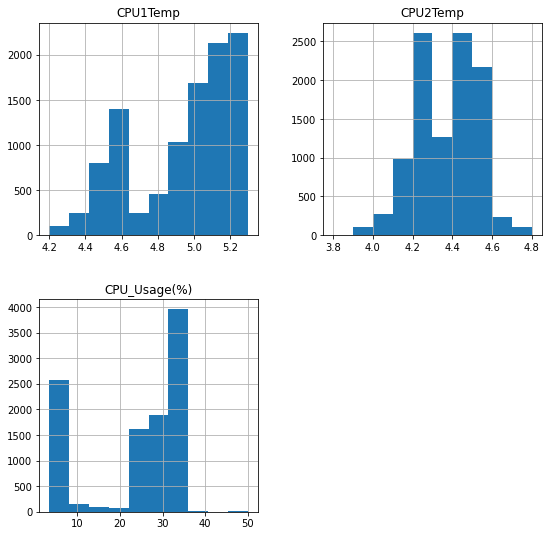

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_set.hist(figsize=(9, 9))